# Raices de funciones

En muchos problemas buscamos conocer el valor $\hat x$ que cumple la condición $f(\hat x)=0$. Este valor se le llama la raiz o cero de la función $f(x)$.

Podemos usar métodos iterativos para aproximar el error absoluto $\vert f(\hat x)-0 \vert <= \varepsilon$, para una tolerancia dada $\varepsilon$.

Los métodos iterativos van a construir una secuencia de valores $x_i \mapsto \hat x$ tal que $i=1 \ldots n$ siendo $n$ la cantidad total de iteraciones.

## Método de Newton

Este método utiliza una expansi\'on de Taylor de primer orden para encontrar raices. Si $f(x)$ es continua en el intervalo $[a,b]$, entonces repetimos la siguiente iteraci\'on:


1.- $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.$ 

2.- Continuar
    


In [1]:
function newton_raphson(f::Function,df::Function,a,eps,N)
    n=1
    x=0. 
    x_old=a
    while n<=N
        x=x_old-f(x_old)/df(x_old)
        y=f(x)
        if f(x)==0 || abs(x-x_old)<eps
            return y,x,n
        end
        x_old=x
        n=n+1 
    end
    println("Method did not converge. The last iteration gives $x with
    function value $f(x)")
    end
            

newton_raphson (generic function with 1 method)

In [2]:
f(x)=x^5+2x^3-5x-2
df(x)=5x^4+6x^2-5
y,x,n=newton_raphson(f,df,0,eps(),20)
print("El valor de x es $x, iteraciones : $n")

El valor de x es -0.4364131329990945, iteraciones : 5

In [3]:
f(x)=1/tan(x)
df(x)=-(4*sin(x)^2)/(-1 + cos(2x))^2

df (generic function with 1 method)

In [4]:
f(1.0),df(1.0)

(0.6420926159343306, -1.4122829274373918)

In [6]:
using ForwardDiff;

autograd(f) = x -> ForwardDiff.derivative(f,x)

autograd(f)(1.0)

-1.4122829274373918

In [7]:
y,x,n=newton_raphson(f,autograd(f),1.0,eps(),20)
print("El valor de x es $x, iteraciones : $n")

El valor de x es 1.5707963267948966, iteraciones : 5

In [8]:
f(x)

6.123233995736766e-17

In [9]:
err=abs(f(x))
print("error absoluto : $err")

error absoluto : 6.123233995736766e-17

In [11]:
using Roots;

x_r=find_zero((f,df),1.0, Roots.Newton())

1.5707963267948966

In [12]:
x

1.5707963267948966

In [13]:
x==x_r

true

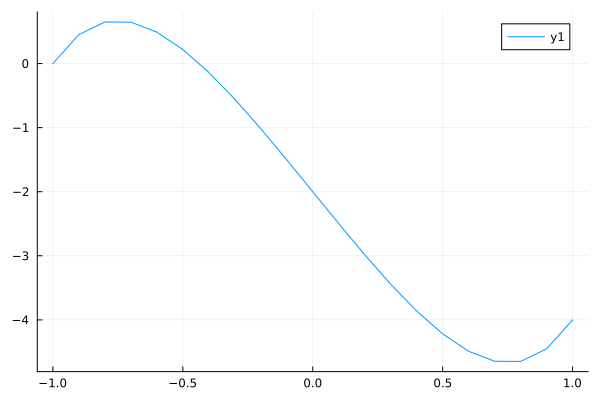

In [6]:
using Plots

x=-1:0.1:1
y=f.(x)

plot(x,y)

https://github.com/JuliaMath/Roots.jl#multiple-zeros

In [14]:
find_zeros(f, -2,  2)

3-element Vector{Float64}:
 -1.5707963267948966
 -0.0
  1.5707963267948966

In [8]:
y,x,n=newton_raphson(f,df,1.0,eps(),100)
print("El valor de x es $x, iteraciones : $n")

El valor de x es 1.3196411672093118, iteraciones : 8

In [9]:
y,x,n=newton_raphson(f,df,-10.0,eps(),100)
print("El valor de x es $x, iteraciones : $n")

El valor de x es -1.0, iteraciones : 15

In [10]:
y,x,n=newton_raphson(f,df,0.0,eps(),100)
print("El valor de x es $x, iteraciones : $n")

El valor de x es -0.4364131329990945, iteraciones : 5

In [11]:
find_zero(f, (-2.0,2.0), Bisection())

1.3196411672093118

In [12]:
sign(f(-2.0))==sign(f(2.0))

false

In [29]:
using ForwardDiff;

autograd(f) = x -> ForwardDiff.derivative(f,x)
f(x)=1.0/tan(x)
df(x)=-(4*sin(x)^2)/(-1 + cos(2x))^2
y,x,n=newton_raphson(f,autograd(f),0.1,eps(),100)
print("El valor de x es $x, iteraciones : $n")

El valor de x es 1.5707963267948966, iteraciones : 9

In [30]:
y,x,n=newton_raphson(f,df,0.1,eps(),100)
print("El valor de x es $x, iteraciones : $n")

El valor de x es 1.5707963267948966, iteraciones : 9

┌ Warning: Module RecipesBase with build ID fafbfcfd-6b91-469b-0000-024555080888 is missing from the cache.
│ This may mean RecipesBase [3cdcf5f2-1ef4-517c-9805-6587b60abb01] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:2541


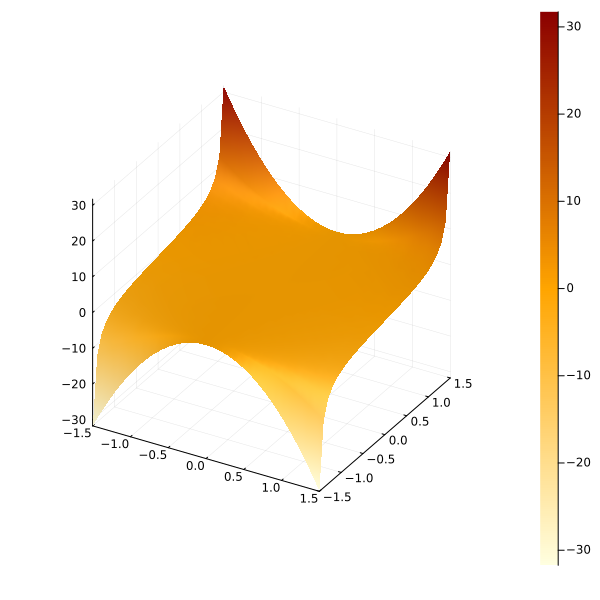

In [21]:
using Plots

function rosenbrock(x::Vector)
  return (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
end

function my_fun(x::Vector)
  return x[1]^2*tan(x[2])
end

default(size=(600,600), fc=:heat)
x, y = -1.5:0.1:1.5, -1.5:0.1:1.5
z = Surface((x,y)->my_fun([x,y]), x, y)
surface(x,y,z, linealpha = 0.3)

In [22]:
rosenbrock([1.,1.])

0.0

In [15]:
using LinearAlgebra;

function mv_newton_raphson(f::Function,df::Function,a,eps,N)
    n=1
    x=a
    x_old=a
    while n<=N
        x=x_old-f(x_old)./df(x_old)
        y=f(x)
        if f(x)==0 || abs.(norm(x-x_old))<=eps
            return y,x,n
        end
        x_old=x
        n=n+1 
    end
    println("Method did not converge. The last iteration gives $x with
    function value $f(x)")
end

mv_newton_raphson (generic function with 1 method)

In [47]:
x_old=[0.999,0.999]
mv_autograd(f) = x -> ForwardDiff.gradient(f,x)
y,x,n=mv_newton_raphson(my_fun,mv_autograd(my_fun),x_old,eps(Float64),1e6)

(0.0, [0.031218749999999993, 0.0], 5)

In [41]:
my_fun(x)

0.0

# Metodo de la Secante

El metodo de la secante utiliza una aproximación numerica de la derivada. 
		
1.- $x_{n+1} = x_n - \frac{f(x_n)\left( x_n - x_{n-1} \right)}{f(x_n) -
            f(x_{n-1})}.$ 

2.- Repetir hasta alcanzar la tolerancia especificada $\vert x_{n+1} - x_n \vert \leq \varepsilon$.
	

In [17]:
function secant(f::Function,a,b,eps,N)
    n=1
    x=0. # to ensure the value of p carries out of the while loop
    x_old=a
    x_temp=b 
    while n<=N
        x=x_old-f(x_old)*(x_old-x_temp)/(f(x_old)-f(x_temp))
        y=f(x)
        if y==0 || abs(x-x_old)<eps
            return y,x,n
        end
    x_temp=x_old
    x_old=x
    n=n+1
    end
    y=f(x)
    println("Method did not converge. The last iteration gives $x with function value $y")
end

secant (generic function with 1 method)

In [18]:
f(x)=x^5+2x^3-5x-2
df(x)=5x^4+6x^2-5
y,x,n=secant(f,1.0,1.1,eps(),20)
print("El valor de x es $x, iteraciones : $n")

El valor de x es 1.3196411672093118, iteraciones : 10

In [19]:
y,x,n=secant(f,-10.0,-10.01,eps(),100)
print("El valor de x es $x, iteraciones : $n")

El valor de x es -1.0, iteraciones : 22

In [21]:
f(x)=1.0/tan(x)
y,x,n=secant(f,3.2,11.2,eps(),100)
print("El valor de x es $x, iteraciones : $n")

El valor de x es 10.995574287564276, iteraciones : 7

# Tarea 

1.- Usando los métodos de la secante, Newton-Raphson y bisección, calcular el cero en el intervalo indicado de las funciones siguientes con un error $\varepsilon =10^{-6}$ usando el criterio de parada $|x_n-x_{n-1}|\leq\epsilon$:
    
a) $f(x)=\mathrm{e}^x+2\cos x-7=0$, para $x$ en el intervalo $[2,3]$.
    
b) $f(x)=\ln x-\frac{1}{20}\mathrm{e}^x=0$, para $x$ en el intervalo $[1,2]$.

2.- Estimar el orden de convergencia para distintos valores de $\varepsilon$. 



In [8]:
#MÉTODO SECANTE, NEWTON-RAPHSON Y BISECCIÓN PARA CADA EJERCICIO

#EJERCICIO 1 BISECCIÓN

function bisection(f::Function,a,b,eps,N)
    n=0
    c=0
    while n<=N
        c=a+(b-a)/2
        if f(c)==0 || abs(a-b)<=eps
            break
        end
        sign(f(c)) == sign(f(a)) ? a=c : b=c
        n+=1
    end
    y=f(c)
    return y,c,n
end

# Definir la función f(x) = ℯ^x + 2cos(x) - 7
f(x) = ℯ^x-tan(x^2)
#f(x) = ℯ^x + 2cos(x) - 7

# Llamar a la función bisección con f(x), intervalo [1, 2], precisión 1e-6, y máximo 100 iteraciones
resultado, raiz, iteraciones = bisection(f, -2, 2, 10^(-1), 100)

# Mostrar resultados
println("Resultado de la función en la raíz: ", resultado)
println("Raíz encontrada: ", raiz)
println("Número de iteraciones: ", iteraciones)

#EJERCICIO 1 NEWTON-RAPHSON


Resultado de la función en la raíz: 0.0593681602757371
Raíz encontrada: -0.65625
Número de iteraciones: 6
